In [97]:
from hdfs import InsecureClient
import pandas as pd
import numpy as np
import re
import seaborn as sns

#### Koneksi ke Hadoop

In [3]:
client_hdfs = InsecureClient('http://127.0.0.1:9870', user="hduser")

#### Collecting data dari data source

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/Ibrahimsyah/PBD_FinalProject/master/weatherHistory.csv')

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [48]:
# Writing Dataframe to hdfs
with client_hdfs.write('/finalProject/input/weather.csv', encoding = 'utf-8') as writer:
    df.to_csv(writer)

#### Mengambil data dari Hadoop

In [49]:
with client_hdfs.read('/finalProject/input/weather.csv', encoding = 'utf-8') as reader:
    df = pd.read_csv(reader,index_col=0)

#### Preprocessing Data

In [53]:
# Define mapper 
def mapper(x):
    x = x.replace(' ', '')
    x = re.sub(r'\([^()]*\)', '', x)
    return x

# Map setiap nama kolom untuk menghilangkan spasi dan kurung
newColumns = df.columns.map(mapper)
df.columns = newColumns
df.head(5)

,FormattedDate,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,LoudCover,Pressure,DailySummary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [94]:
test = df.copy()
test.FormattedDate = test.FormattedDate.map(lambda x: x.split(' ')[0])

dates = np.unique(test.FormattedDate)

temperatureMeans = []
for date in dates:
    date1 = test.loc[test['FormattedDate'] == date]
    mean = np.mean(date1['Temperature'].values)
    temperatureMeans.append({'date': date, 'mean': mean})

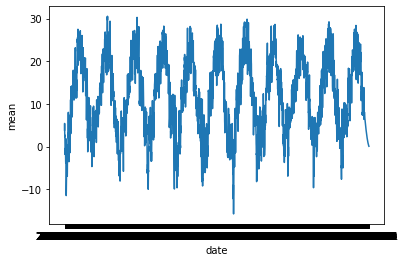

In [98]:
meanDf = pd.DataFrame(temperatureMeans)
sns.lineplot(data=meanDf, x="date", y="mean")